In [51]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
warnings.filterwarnings('ignore')

In [52]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data')
df.head()

,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [53]:
df.columns = ['Age', 'workclass','fnlwgt','education','education-num','maritalstatus','occupation','relationship','race',
              'sex','capitalgain','capitalloss','hours_per_week','country','class']
df.head()

,Age,workclass,fnlwgt,education,education-num,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hours_per_week,country,class
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [54]:
df.shape

(32560, 15)

In [55]:
df.isnull().sum()

Age               0
workclass         0
fnlwgt            0
education         0
education-num     0
maritalstatus     0
occupation        0
relationship      0
race              0
sex               0
capitalgain       0
capitalloss       0
hours_per_week    0
country           0
class             0
dtype: int64

In [56]:
print(df['class'].unique(),'\n')
print(df['Age'].unique(),'\n')
print(df['workclass'].unique(),'\n')

[' <=50K' ' >50K'] 

[50 38 53 28 37 49 52 31 42 30 23 32 40 34 25 43 54 35 59 56 19 39 20 45
 22 48 21 24 57 44 41 29 18 47 46 36 79 27 67 33 76 17 55 61 70 64 71 68
 66 51 58 26 60 90 75 65 77 62 63 80 72 74 69 73 81 78 88 82 83 84 85 86
 87] 

[' Self-emp-not-inc' ' Private' ' State-gov' ' Federal-gov' ' Local-gov'
 ' ?' ' Self-emp-inc' ' Without-pay' ' Never-worked'] 



In [57]:
def MockTargetClass(x):
    x = x.strip()
    if(x == '<=50K'):
        return 0
    else:
        return 1
df['class'] = df['class'].apply(MockTargetClass)

In [58]:
df.head()

,Age,workclass,fnlwgt,education,education-num,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hours_per_week,country,class
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,0


In [59]:
def  TrimSpaces(x):
    return x.strip()
df['workclass'] = df['workclass'].apply(TrimSpaces)
df['maritalstatus'] = df['maritalstatus'].apply(TrimSpaces)
df['occupation'] = df['occupation'].apply(TrimSpaces)
df['relationship'] = df['relationship'].apply(TrimSpaces)
df['education'] = df['education'].apply(TrimSpaces)
df['race'] = df['race'].apply(TrimSpaces)
df['sex'] = df['sex'].apply(TrimSpaces)
df['country'] = df['country'].apply(TrimSpaces)

In [60]:
def MarkUnknownWorkClass(x):
    if(x == '?'):
        return 'Others'
    elif 'self-emp' in x.lower():
        return 'Self_employed'
    elif x == 'Without-pay' or x == 'Never-worked':
        return 'Without-pay/Never-worked'
    else:
        return x
df['workclass'] = df['workclass'].apply(MarkUnknownWorkClass)

In [61]:
df['workclass'].unique()

array(['Self_employed', 'Private', 'State-gov', 'Federal-gov',
       'Local-gov', 'Others', 'Without-pay/Never-worked'], dtype=object)

In [62]:
df[(df['workclass'] == 'Without-pay/Never-worked')]['class']

1900     0
5360     0
9256     0
10844    0
14771    0
15532    0
15694    0
16811    0
20072    0
20336    0
21943    0
22214    0
23231    0
24595    0
25499    0
27746    0
28828    0
29157    0
32261    0
32303    0
32313    0
Name: class, dtype: int64

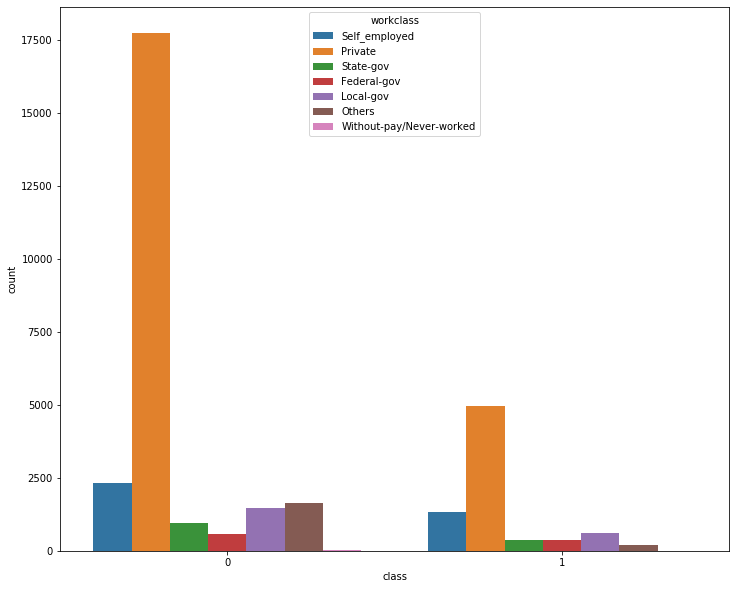

In [63]:
plt.figure(figsize=(12,10))
sns.countplot(x='class',hue='workclass',data=df)

In [64]:
df['maritalstatus'].unique()

array(['Married-civ-spouse', 'Divorced', 'Married-spouse-absent',
       'Never-married', 'Separated', 'Married-AF-spouse', 'Widowed'],
      dtype=object)

In [65]:
df[['maritalstatus','relationship']]

,maritalstatus,relationship
0,Married-civ-spouse,Husband
1,Divorced,Not-in-family
2,Married-civ-spouse,Husband
3,Married-civ-spouse,Wife
4,Married-civ-spouse,Wife
...,...,...
32555,Married-civ-spouse,Wife
32556,Married-civ-spouse,Husband
32557,Widowed,Unmarried
32558,Never-married,Own-child


In [66]:
df[df['maritalstatus'] == 'Widowed'][['maritalstatus','relationship']]['relationship'].value_counts()

Not-in-family     547
Unmarried         383
Other-relative     48
Own-child          15
Name: relationship, dtype: int64

In [67]:
df.head()

,Age,workclass,fnlwgt,education,education-num,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hours_per_week,country,class
0,50,Self_employed,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,0


In [68]:
def HandleMaritialStatus(x):
    if 'married-civ-spouse' in x.lower():
        return 'Married'
    elif 'married-af-spouse' in x.lower():
        return 'Married'
    elif 'separated' in x.lower():
        return 'Divorced'
    elif 'never-married' in x.lower():
        return 'UnMarried'
    elif 'married-spouse-absent' in x.lower():
        return 'Divorced'
    else:
        return x

In [69]:
df['maritalstatus'] = df['maritalstatus'].apply(HandleMaritialStatus)
df.head()

,Age,workclass,fnlwgt,education,education-num,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hours_per_week,country,class
0,50,Self_employed,83311,Bachelors,13,Married,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
2,53,Private,234721,11th,7,Married,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
3,28,Private,338409,Bachelors,13,Married,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0
4,37,Private,284582,Masters,14,Married,Exec-managerial,Wife,White,Female,0,0,40,United-States,0


In [70]:
df['maritalstatus'].unique()

array(['Married', 'Divorced', 'UnMarried', 'Widowed'], dtype=object)

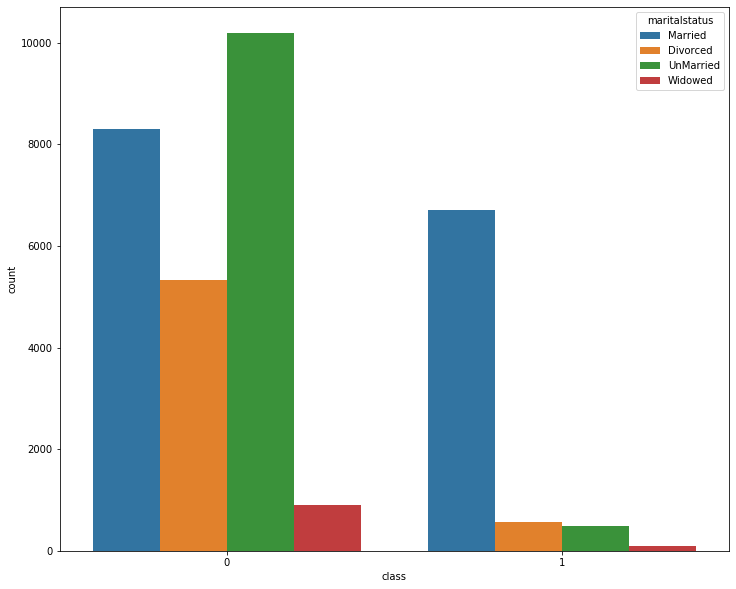

In [71]:
plt.figure(figsize=(12,10))
sns.countplot(x='class',hue='maritalstatus',data=df)

In [72]:
df.drop(columns=['relationship'],inplace=True)

In [73]:
df.race.unique()

array(['White', 'Black', 'Asian-Pac-Islander', 'Amer-Indian-Eskimo',
       'Other'], dtype=object)

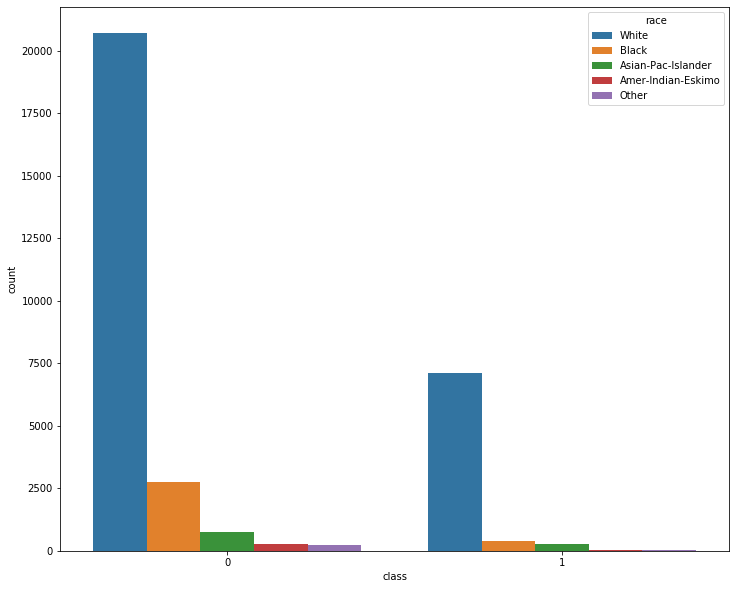

In [25]:
plt.figure(figsize=(12,10))
sns.countplot(x='class',hue='race',data=df)

In [26]:
df.columns

Index(['Age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'maritalstatus', 'occupation', 'race', 'sex', 'capitalgain',
       'capitalloss', 'hours_per_week', 'country', 'class'],
      dtype='object')

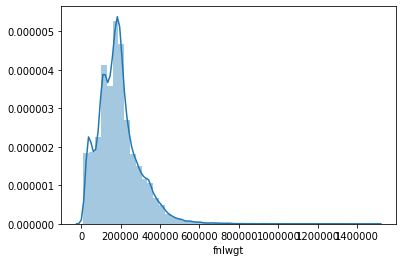

In [74]:
sns.distplot(df['fnlwgt']);

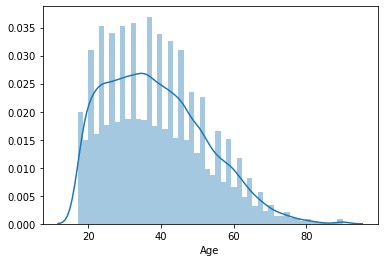

In [75]:
sns.distplot(df['Age']);

In [76]:
df.country.unique()

array(['United-States', 'Cuba', 'Jamaica', 'India', '?', 'Mexico',
       'South', 'Puerto-Rico', 'Honduras', 'England', 'Canada', 'Germany',
       'Iran', 'Philippines', 'Italy', 'Poland', 'Columbia', 'Cambodia',
       'Thailand', 'Ecuador', 'Laos', 'Taiwan', 'Haiti', 'Portugal',
       'Dominican-Republic', 'El-Salvador', 'France', 'Guatemala',
       'China', 'Japan', 'Yugoslavia', 'Peru',
       'Outlying-US(Guam-USVI-etc)', 'Scotland', 'Trinadad&Tobago',
       'Greece', 'Nicaragua', 'Vietnam', 'Hong', 'Ireland', 'Hungary',
       'Holand-Netherlands'], dtype=object)

In [77]:
def HandleUnknownCountry(x):
    if x.strip().lower() == '?':
        return 'Others'
    else:
        return x
df['country'] = df['country'].apply(HandleUnknownCountry)
df.head()

,Age,workclass,fnlwgt,education,education-num,maritalstatus,occupation,race,sex,capitalgain,capitalloss,hours_per_week,country,class
0,50,Self_employed,83311,Bachelors,13,Married,Exec-managerial,White,Male,0,0,13,United-States,0
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,White,Male,0,0,40,United-States,0
2,53,Private,234721,11th,7,Married,Handlers-cleaners,Black,Male,0,0,40,United-States,0
3,28,Private,338409,Bachelors,13,Married,Prof-specialty,Black,Female,0,0,40,Cuba,0
4,37,Private,284582,Masters,14,Married,Exec-managerial,White,Female,0,0,40,United-States,0


In [78]:
df.country.value_counts(ascending=False)

United-States                 29169
Mexico                          643
Others                          583
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        64
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
France                      

In [79]:
average_hours = df['hours_per_week'].mean()
average_hours = round(average_hours)

In [80]:
df[df['hours_per_week']<average_hours/2]

,Age,workclass,fnlwgt,education,education-num,maritalstatus,occupation,race,sex,capitalgain,capitalloss,hours_per_week,country,class
0,50,Self_employed,83311,Bachelors,13,Married,Exec-managerial,White,Male,0,0,13,United-States,0
5,49,Private,160187,9th,5,Divorced,Other-service,Black,Female,0,0,16,Jamaica,0
33,22,State-gov,311512,Some-college,10,Married,Other-service,Black,Male,0,0,15,United-States,0
76,67,Others,212759,10th,6,Married,?,White,Male,0,0,2,United-States,0
156,71,Self_employed,494223,Some-college,10,Divorced,Sales,Black,Male,0,1816,2,United-States,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32493,82,Others,403910,HS-grad,9,UnMarried,?,White,Male,0,0,3,United-States,0
32523,26,Private,191648,Assoc-acdm,12,UnMarried,Machine-op-inspct,White,Female,0,0,15,United-States,0
32524,81,Others,120478,Assoc-voc,11,Divorced,?,White,Female,0,0,1,Others,0
32538,71,Others,287372,Doctorate,16,Married,?,White,Male,0,0,10,United-States,1


In [81]:
df.education.unique()

array(['Bachelors', 'HS-grad', '11th', 'Masters', '9th', 'Some-college',
       'Assoc-acdm', 'Assoc-voc', '7th-8th', 'Doctorate', 'Prof-school',
       '5th-6th', '10th', '1st-4th', 'Preschool', '12th'], dtype=object)

In [82]:
df.education.value_counts()

HS-grad         10501
Some-college     7291
Bachelors        5354
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: education, dtype: int64

In [83]:
#Bachelors,Masters,below_hs, HS,Doctorate,Others
df1 = df.copy()

In [84]:
def HandleEducation(x):
    if x == '1st-4th' or x == '5th-6th':
        return '1st-6th'
    elif x=='9th' or x=='10th' or x=='7th-8th':
        return '7th-10th'
    elif x=='11th' or x=='12th' or x=='HS-grad':
        return 'Higher_Secondary'
    elif x=='Some-college':
        return 'Bachelors'
    elif x=='Assoc-voc' or x=='Assoc-acdm' or x=='Prof-school':
        return 'Others'
    else:
        return x
df1['education']=df1['education'].apply(HandleEducation)
df1.head()

,Age,workclass,fnlwgt,education,education-num,maritalstatus,occupation,race,sex,capitalgain,capitalloss,hours_per_week,country,class
0,50,Self_employed,83311,Bachelors,13,Married,Exec-managerial,White,Male,0,0,13,United-States,0
1,38,Private,215646,Higher_Secondary,9,Divorced,Handlers-cleaners,White,Male,0,0,40,United-States,0
2,53,Private,234721,Higher_Secondary,7,Married,Handlers-cleaners,Black,Male,0,0,40,United-States,0
3,28,Private,338409,Bachelors,13,Married,Prof-specialty,Black,Female,0,0,40,Cuba,0
4,37,Private,284582,Masters,14,Married,Exec-managerial,White,Female,0,0,40,United-States,0


In [85]:
df1.education.value_counts()

Bachelors           12645
Higher_Secondary    12109
Others               3025
7th-10th             2093
Masters              1723
1st-6th               501
Doctorate             413
Preschool              51
Name: education, dtype: int64

In [86]:
df['occupation'].unique()

array(['Exec-managerial', 'Handlers-cleaners', 'Prof-specialty',
       'Other-service', 'Adm-clerical', 'Sales', 'Craft-repair',
       'Transport-moving', 'Farming-fishing', 'Machine-op-inspct',
       'Tech-support', '?', 'Protective-serv', 'Armed-Forces',
       'Priv-house-serv'], dtype=object)

In [87]:
df1['occupation'] = df1['occupation'].apply(lambda x:'Other-service' if x=='?' else x)

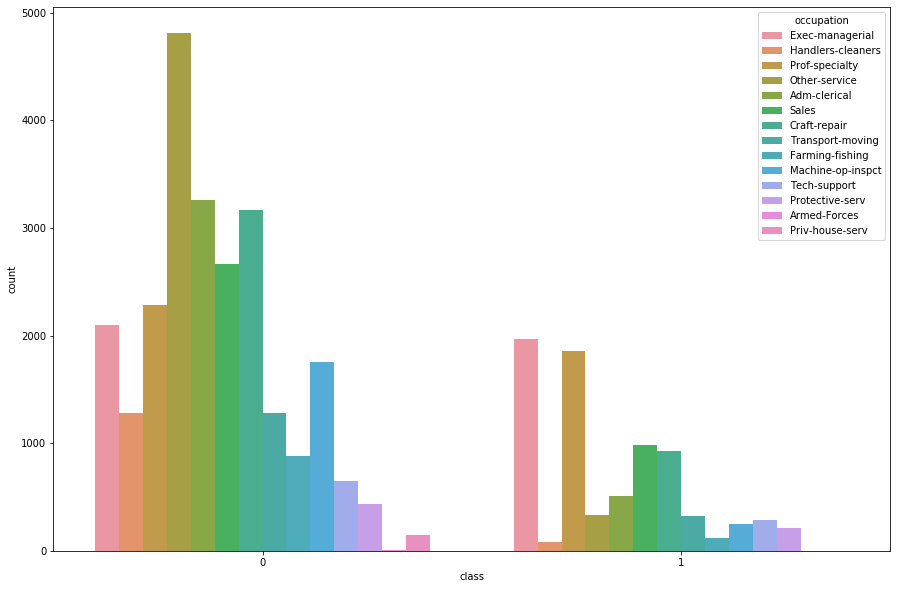

In [41]:
plt.figure(figsize=(15,10))
sns.countplot(x='class',hue='occupation',data=df1)

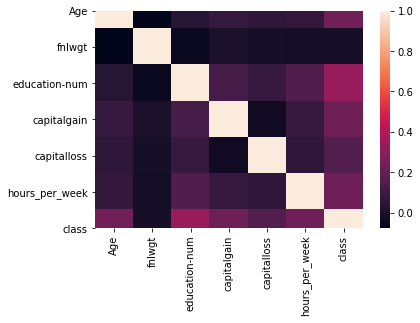

In [42]:
sns.heatmap(df1.corr())

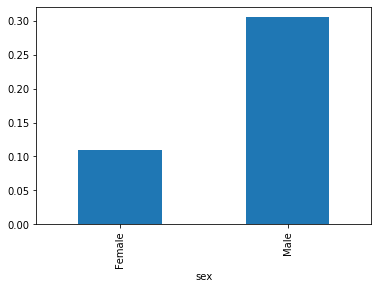

In [88]:
df1.groupby('sex')['class'].mean().plot(kind='bar')

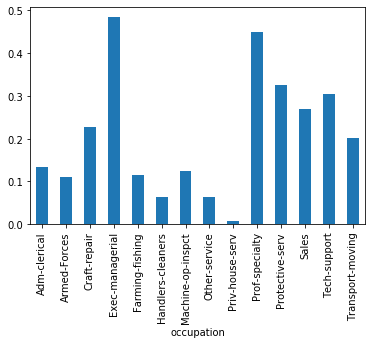

In [89]:
df1.groupby('occupation')['class'].mean().plot(kind='bar')

In [90]:
df1.dtypes

Age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
maritalstatus     object
occupation        object
race              object
sex               object
capitalgain        int64
capitalloss        int64
hours_per_week     int64
country           object
class              int64
dtype: object

In [91]:
from sklearn.preprocessing import LabelEncoder
labelencoder_workclass = LabelEncoder()
df1['workclass_enc'] = labelencoder_workclass.fit_transform(df1['workclass'])
df1.head()

,Age,workclass,fnlwgt,education,education-num,maritalstatus,occupation,race,sex,capitalgain,capitalloss,hours_per_week,country,class,workclass_enc
0,50,Self_employed,83311,Bachelors,13,Married,Exec-managerial,White,Male,0,0,13,United-States,0,4
1,38,Private,215646,Higher_Secondary,9,Divorced,Handlers-cleaners,White,Male,0,0,40,United-States,0,3
2,53,Private,234721,Higher_Secondary,7,Married,Handlers-cleaners,Black,Male,0,0,40,United-States,0,3
3,28,Private,338409,Bachelors,13,Married,Prof-specialty,Black,Female,0,0,40,Cuba,0,3
4,37,Private,284582,Masters,14,Married,Exec-managerial,White,Female,0,0,40,United-States,0,3


In [93]:
labelencoder_occupation = LabelEncoder()
df1['occupation_enc'] = labelencoder_occupation.fit_transform(df1['occupation'])

labelencoder_education = LabelEncoder()
df1['education_enc'] = labelencoder_education.fit_transform(df1['education'])

labelencoder_maritalstatus = LabelEncoder()
df1['maritalstatus_enc'] = labelencoder_education.fit_transform(df1['maritalstatus'])


labelencoder_maritalstatus = LabelEncoder()
df1['race_Enc'] = labelencoder_education.fit_transform(df1['race'])

labelencoder_maritalstatus = LabelEncoder()
df1['sex_enc'] = labelencoder_education.fit_transform(df1['sex'])

labelencoder_maritalstatus = LabelEncoder()
df1['country_enc'] = labelencoder_education.fit_transform(df1['country'])


In [94]:
df1.columns

Index(['Age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'maritalstatus', 'occupation', 'race', 'sex', 'capitalgain',
       'capitalloss', 'hours_per_week', 'country', 'class', 'workclass_enc',
       'occupation_enc', 'education_enc', 'maritalstatus_enc', 'race_Enc',
       'sex_enc', 'country_enc'],
      dtype='object')

In [96]:
df2 = df1[['Age','education-num','capitalgain','capitalloss','hours_per_week','class',
          'workclass_enc', 'occupation_enc', 'education_enc', 'maritalstatus_enc',
           'race_Enc', 'sex_enc', 'country_enc']]
df2.head()

,Age,education-num,capitalgain,capitalloss,hours_per_week,class,workclass_enc,occupation_enc,education_enc,maritalstatus_enc,race_Enc,sex_enc,country_enc
0,50,13,0,0,13,0,4,3,2,1,4,1,39
1,38,9,0,0,40,0,3,5,4,0,4,1,39
2,53,7,0,0,40,0,3,5,4,1,2,1,39
3,28,13,0,0,40,0,3,9,2,1,2,0,4
4,37,14,0,0,40,0,3,3,5,1,4,0,39


In [97]:
X = df2.drop(columns=['class'])
y = df2['class']

In [98]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [99]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.8186133085155887

In [100]:
from sklearn.linear_model import LogisticRegression,LinearRegression
model = LogisticRegression(C=100)
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.8184271754304328

In [101]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
def find_best_model_usingGrdSearchcv(X,y):
    algos={
        'Lasso':{
            'model':Lasso(),
             'params':{
                 'alpha':[1,2],
                 'selection':['random','cyclic']
             }
        },
        'RandomForestClassifier':{
            'model':RandomForestClassifier(),
             'params':{
                 'criterion':['gini','entropy'],
                 'random_state':[42],
                 'min_samples_leaf':[10,20,30]
             }
        },
        'LogisticRegression':{
            'model':LogisticRegression(),
             'params':{
                 'C':[100,200,300,400,500]
             }
        },
        'DecisionTree':{
            'model':DecisionTreeRegressor(),
             'params':{
                 'criterion':['mse','friedman_mse'],
                 'splitter':['best','random']
                
             }    
        },
        'Linear_regression':{
            'model':LinearRegression(),
             'params':{
                 'normalize':[True,False]
             }
            
        },
    }
    scores=[]
    cv=ShuffleSplit(n_splits=5,test_size=0.2,random_state=0)
    for algo_name,config in algos.items():
        print(algo_name)
        gs = GridSearchCV(config['model'],config['params'],cv=cv,return_train_score=False)
        gs.fit(X,y)
        scores.append({
        'model':algo_name,
        'best_Score':gs.best_score_,
        'best_params':gs.best_params_
        })
    return pd.DataFrame(scores,columns=['model','best_Score','best_params'])

In [102]:
find_best_model_usingGrdSearchcv(X_train,y_train)

Lasso
RandomForestClassifier
LogisticRegression
DecisionTree
Linear_regression


,model,best_Score,best_params
0,Lasso,0.091126,"{'alpha': 1, 'selection': 'random'}"
1,RandomForestClassifier,0.857208,"{'criterion': 'entropy', 'min_samples_leaf': 1..."
2,LogisticRegression,0.825166,{'C': 300}
3,DecisionTree,0.035279,"{'criterion': 'mse', 'splitter': 'best'}"
4,Linear_regression,0.256848,{'normalize': True}


# RandomForestClassifier performing Well from above result

In [103]:
model_r = RandomForestClassifier(criterion='entropy',random_state=42,min_samples_leaf=10)
model_r.fit(X_train,y_train)
model_r.score(X_test,y_test)

0.8600279199627734

In [104]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score,classification_report,roc_auc_score

In [105]:
predict = model_r.predict(X_test)

In [106]:
confusion_matrix(y_test, predict)

array([[7699,  417],
       [1087, 1542]], dtype=int64)

In [107]:
accuracy_score(y_test, predict)

0.8600279199627734

In [108]:
print(classification_report(y_test, predict))

              precision    recall  f1-score   support

           0       0.88      0.95      0.91      8116
           1       0.79      0.59      0.67      2629

    accuracy                           0.86     10745
   macro avg       0.83      0.77      0.79     10745
weighted avg       0.85      0.86      0.85     10745



In [109]:
roc_auc_score(y_test, predict)

0.7675774069825492